# Used Cars Price Prediction

## Project Overview
The main goal of this project is to develop a machine learning model that can accurately predict used car prices based on various characteristics such as brand, model, year of manufacture, mileage, condition and other related factors:

- Analyze and process data 
- Find a suitable model and build model
- Create a simple flask application
  
## Problem statement 
The used car market is vast and complex, with prices varying significantly based on numerous factors such as make, model, year, mileage, condition, and location. For buyers, determining a fair price for a used car can be challenging due to the multitude of influencing factors. Similarly, sellers may struggle to set a competitive yet profitable price. The lack of standardized pricing mechanisms often leads to uncertainty and potential financial loss for both parties.

## Metrics 
Define metrics to measure results. Use R-squared and Mean Absolute Error (MAE) to evaluate the accuracy of the prediction model.

## Importing libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from openTSNE import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

## Reading the data

In [55]:
data = pd.read_csv('d:/ADY201m_Project/Car_prediction/train-data.csv')
data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [56]:
# DataFrame summary statistics 
print(data.describe())

        Unnamed: 0         Year  Kilometers_Driven        Seats        Price
count  6019.000000  6019.000000       6.019000e+03  5977.000000  6019.000000
mean   3009.000000  2013.358199       5.873838e+04     5.278735     9.479468
std    1737.679967     3.269742       9.126884e+04     0.808840    11.187917
min       0.000000  1998.000000       1.710000e+02     0.000000     0.440000
25%    1504.500000  2011.000000       3.400000e+04     5.000000     3.500000
50%    3009.000000  2014.000000       5.300000e+04     5.000000     5.640000
75%    4513.500000  2016.000000       7.300000e+04     5.000000     9.950000
max    6018.000000  2019.000000       6.500000e+06    10.000000   160.000000


# Data preprocessing

In [57]:
# Remove the string 'CC' from the values ​​in the 'Engine' column and convert them to floats
data['EngineCC'] = data['Engine'].str.replace('CC', '').astype('float')
# Display the first 5 rows of the DataFrame to check the results
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,EngineCC
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,998.0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,1582.0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,1199.0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,1248.0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,1968.0


In [58]:
# Remove string 'bhp' from values ​​in column 'Power' and save to new column 'PowerPHP'
data['PowerPHP'] = data['Power'].str.replace('bhp', '')
# Replace 'null' values ​​with 'NaN' in column 'PowerPHP'
data['PowerPHP'] = data['PowerPHP'].str.replace('null','NaN')
# Convert values ​​in column 'PowerPHP' to float
data['PowerPHP'] = data['PowerPHP'].astype('float')

In [59]:
data['PowerPHP']

0        58.16
1       126.20
2        88.70
3        88.76
4       140.80
         ...  
6014     74.00
6015     71.00
6016    112.00
6017     67.10
6018     57.60
Name: PowerPHP, Length: 6019, dtype: float64

In [60]:
# Print out the different fuel types included in the data
print(data['Fuel_Type'].unique())

['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']


In [61]:
# Display entire DataFrame 'data'
data
# Split column 'Mileage' into two new columns 'Mileage_gt' and 'Mileage_dv'
data[['Mileage_gt','Mileage_dv']] = data['Mileage'].str.split(' ',n=1, expand=True)
# Convert the values ​​in column 'Mileage_gt' to float
data['Mileage_gt'] = data['Mileage_gt'].astype('float')
# Display the first 5 rows of the DataFrame to check the results
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,EngineCC,PowerPHP,Mileage_gt,Mileage_dv
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,998.0,58.16,26.60,km/kg
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,1582.0,126.20,19.67,kmpl
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,1199.0,88.70,18.20,kmpl
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,1248.0,88.76,20.77,kmpl
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,1968.0,140.80,15.20,kmpl


In [62]:
# Print out all the different units of measurement contained in column 'Mileage_dv'
data['Mileage_dv'].unique()

array(['km/kg', 'kmpl', nan], dtype=object)

In [63]:
# Create a dictionary with the price of each fuel type after dividing by 24000
gia = {'CNG':39600/24000,'Diesel':20190/24000,'Petrol':22880/24000,'LPG':14700/24000}
print(gia)

{'CNG': 1.65, 'Diesel': 0.84125, 'Petrol': 0.9533333333333334, 'LPG': 0.6125}


In [64]:
# Delete rows in DataFrame 'data' where column 'Mileage_dv' has value NaN
data = data.dropna(subset=['Mileage_dv'])
# Filter rows in DataFrame 'data' keeping only those rows with value 'Electric' in column 'Fuel_Type'
data.query('Fuel_Type == "Electric"')

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,EngineCC,PowerPHP,Mileage_gt,Mileage_dv


In [65]:
# Calculate the price per kilometer for each row in the DataFrame
# 'price_per_km' is computed by dividing the price of the fuel type by the mileage in 'Mileage_gt'

data['price_per_km'] = data['Fuel_Type'].apply(lambda x: gia[x]) / data['Mileage_gt']
data

C:\Users\Admin\AppData\Local\Temp\ipykernel_11668\2098579038.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_per_km'] = data['Fuel_Type'].apply(lambda x: gia[x]) / data['Mileage_gt']


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,EngineCC,PowerPHP,Mileage_gt,Mileage_dv,price_per_km
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,998.0,58.16,26.60,km/kg,0.062030
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,1582.0,126.20,19.67,kmpl,0.042768
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,1199.0,88.70,18.20,kmpl,0.052381
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,1248.0,88.76,20.77,kmpl,0.040503
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,1968.0,140.80,15.20,kmpl,0.055345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75,1248.0,74.00,28.40,kmpl,0.029621
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00,1120.0,71.00,24.40,kmpl,0.034477
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90,2498.0,112.00,14.00,kmpl,0.060089
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65,998.0,67.10,18.90,kmpl,0.050441


# Data Visualization

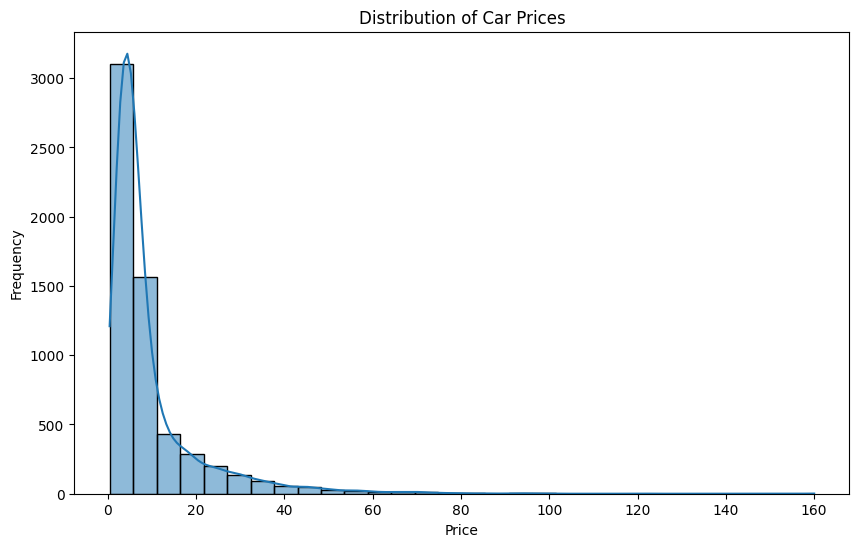

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11668\531932517.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Name', y='Price', data=filtered_data, estimator=np.mean, ci=None)  # ci=None removes error bars


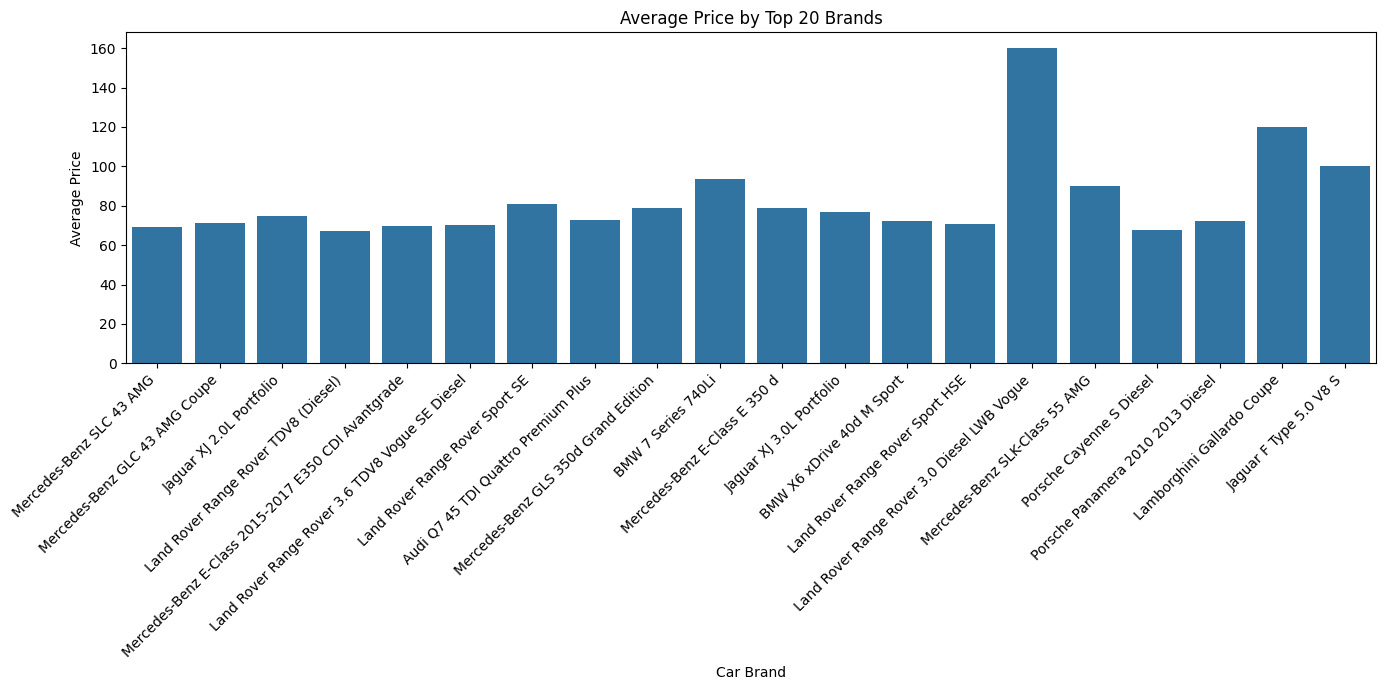

In [67]:
brand_price = data.groupby('Name')['Price'].mean().sort_values(ascending=False)
# Select the top 20 brands
top_brands = brand_price.head(20).index
# Filter the data to include only the top brands
filtered_data = data[data['Name'].isin(top_brands)]
# Plot the average price for the top brands
plt.figure(figsize=(14, 7))
sns.barplot(x='Name', y='Price', data=filtered_data, estimator=np.mean, ci=None)  # ci=None removes error bars
plt.title('Average Price by Top 20 Brands')
plt.xlabel('Car Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right
plt.tight_layout()  # Adjust the plot to make room for the rotated labels
plt.show()

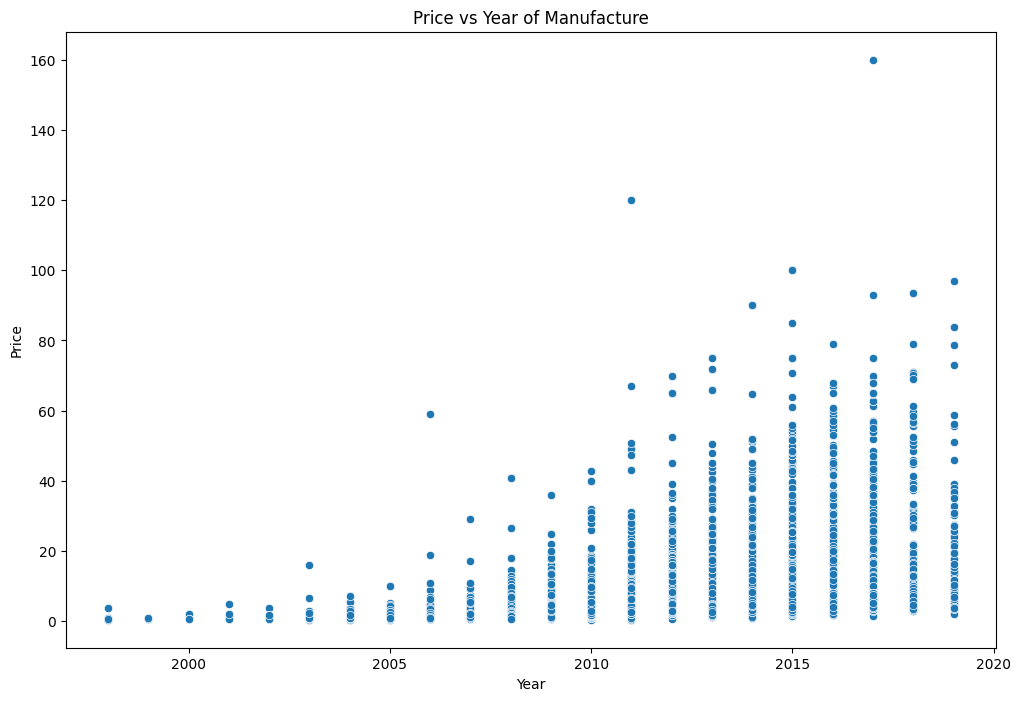

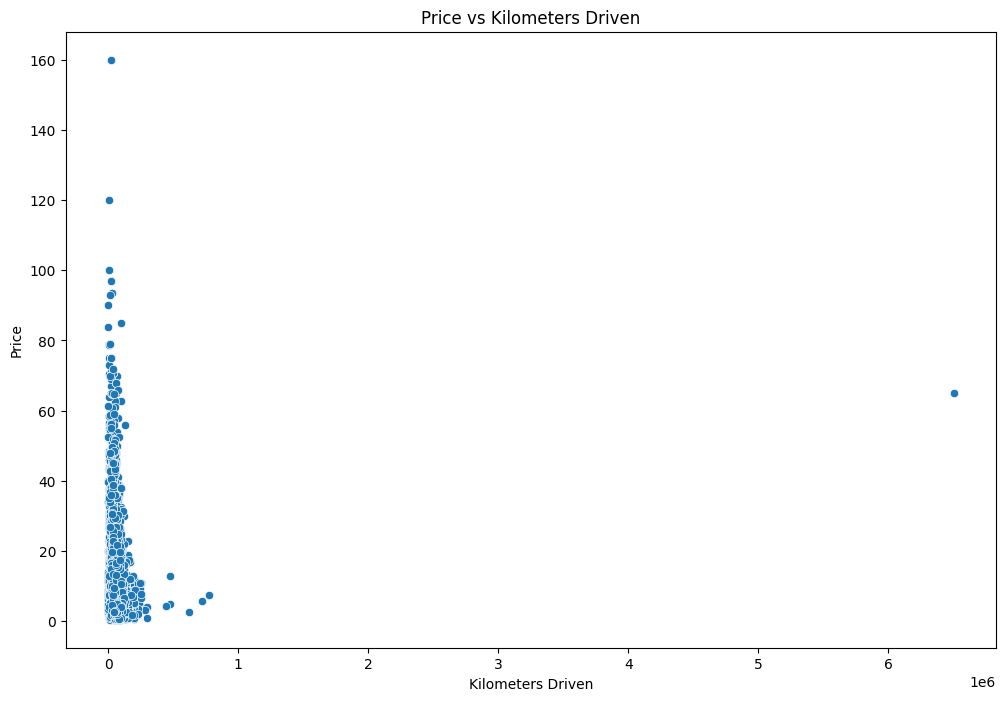

In [68]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Year', y='Price', data=data)
plt.title('Price vs Year of Manufacture')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Kilometers_Driven', y='Price', data=data)
plt.title('Price vs Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()

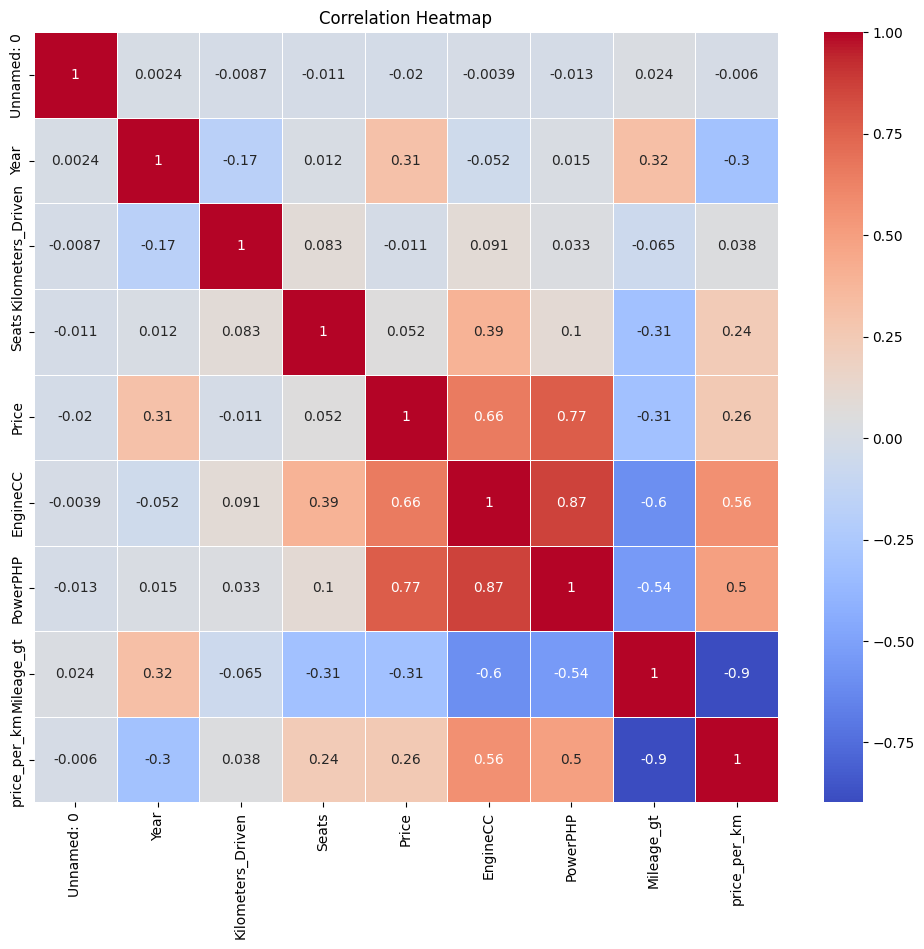

In [69]:
# Select only numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



# Creates a preprocessed DataFrame

In [70]:
# Select specific columns from the 'data' DataFrame and create a new DataFrame 'data_learing'
data_learing = data[['Year','Kilometers_Driven','Fuel_Type','price_per_km','Transmission','Owner_Type','EngineCC','PowerPHP','Seats','Price']]

In [71]:
# Replace infinite values (both positive and negative) with NaN in the 'data_learing' DataFrame
data_learing.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop all rows with any NaN values in the 'data_learing' DataFrame
data_learing = data_learing.dropna()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11668\2657547856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_learing.replace([np.inf, -np.inf], np.nan, inplace=True)


In [72]:
# Get unique values in the 'Owner_Type' column of the 'data_learing' DataFrame
data_learing['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [73]:
# Define a mapping from categorical 'Owner_Type' values to ordinal numeric values
ordinal_mapping = {
    'First': 1,
    'Second': 2,
    'Third': 3,
    'Fourth & Above': 4,
# Add more mappings if needed
}
# Apply the ordinal mapping to the 'Owner_Type' column in the 'data_learing' DataFrame
data_learing['Owner_Type'] = data_learing['Owner_Type'].map(ordinal_mapping)

In [74]:
# Get unique values in the 'Transmission' column of the 'data_learing' DataFrame
data_learing['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [75]:
# Define a mapping from categorical 'Transmission' values to ordinal numeric values
ordinal_mapping = {
    'Manual': 1,
    'Automatic': 2,
# Add more mappings if needed
}
# Apply the ordinal mapping to the 'Transmission' column in the 'data_learing' DataFrame
data_learing['Transmission'] = data_learing['Transmission'].map(ordinal_mapping)

In [76]:
# Get unique values in the 'Fuel_Type' column of the 'data_learing' DataFrame
data_learing['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [77]:
# Define a mapping from categorical 'Fuel_Type' values to ordinal numeric values
ordinal_mapping = {
    'Petrol': 1,
    'Diesel': 2,
    'LPG': 3,
    'CNG': 4,
 # Add more mappings if needed
}
# Apply the ordinal mapping to the 'Fuel_Type' column in the 'data_learing' DataFrame
data_learing['Fuel_Type'] = data_learing['Fuel_Type'].map(ordinal_mapping)

In [78]:
data_learing

,Year,Kilometers_Driven,Fuel_Type,price_per_km,Transmission,Owner_Type,EngineCC,PowerPHP,Seats,Price
0,2010,72000,4,0.062030,1,1,998.0,58.16,5.0,1.75
1,2015,41000,2,0.042768,1,1,1582.0,126.20,5.0,12.50
2,2011,46000,1,0.052381,1,1,1199.0,88.70,5.0,4.50
3,2012,87000,2,0.040503,1,1,1248.0,88.76,7.0,6.00
4,2013,40670,2,0.055345,2,2,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,2,0.029621,1,1,1248.0,74.00,5.0,4.75
6015,2015,100000,2,0.034477,1,1,1120.0,71.00,5.0,4.00
6016,2012,55000,2,0.060089,1,2,2498.0,112.00,8.0,2.90
6017,2013,46000,1,0.050441,1,1,998.0,67.10,5.0,2.65


In [79]:
# Define the feature variables (X) and target variable (Y) for the model
X = data_learing[['Year', 'Kilometers_Driven', 'Fuel_Type', 'price_per_km', 'Transmission', 'Owner_Type', 'EngineCC', 'PowerPHP','Seats']]
 # Target variable: Price of the vehicle scaled up by 100,000
Y = data_learing['Price'] * 100000
# Split the data into training and testing sets
# 80% of the data is used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# Create a Linear Regression model
model = LinearRegression()

# Training model 

In [80]:
model.fit(X_train, y_train)

LinearRegression()

In [81]:
# Make predictions on the test set using the trained model
from sklearn.metrics import mean_squared_error, r2_score
# Calculate the Mean Squared Error (MSE) between the true values (y_test) and the predicted values (y_pred)
y_pred = model.predict(X_test)
# Calculate the Mean Squared Error (MSE) between the true values (y_test) and the predicted values (y_pred)
mse = mean_squared_error(y_test, y_pred)
# Calculate the R-squared (R²) score, which measures the proportion of variance in the target variable that is predictable from the features
r2 = r2_score(y_test, y_pred)
# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 497306372539.98773
R^2 Score: 0.6620604629138565


In [82]:
from sklearn.linear_model import Ridge
# Create a Ridge Regression model
ridge_model = Ridge()
# Fit the Ridge Regression model to the training data
ridge_model.fit(X_train, y_train)
# Make predictions on the test set using the trained Ridge Regression model
y_pred = ridge_model.predict(X_test)
# Calculate the Mean Squared Error (MSE) between the true values (y_test) and the predicted values (y_pred)
mse = mean_squared_error(y_test, y_pred)
# Calculate the R-squared (R²) score, which measures the proportion of variance in the target variable that is predictable from the features
r2 = r2_score(y_test, y_pred)
# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 498038531803.5757
R^2 Score: 0.6615629314598626


In [83]:
from sklearn.linear_model import Lasso
# Create a Lasso Regression model
Lasso_model = Lasso()
# Fit the Lasso Regression model to the training data
Lasso_model.fit(X_train, y_train)
# Make predictions on the test set using the trained Lasso Regression model
y_pred = Lasso_model.predict(X_test)
# Calculate the Mean Squared Error (MSE) between the true values (y_test) and the predicted values (y_pred)
mse = mean_squared_error(y_test, y_pred)
# Calculate the R-squared (R²) score, which measures the proportion of variance in the target variable that is predictable from the features
r2 = r2_score(y_test, y_pred)
# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 497310059748.7823
R^2 Score: 0.6620579573082539


In [84]:
from sklearn.neural_network import MLPRegressor
# Create an MLP Regressor model (Multi-layer Perceptron)
mlp_model = MLPRegressor()
# Fit the MLP Regressor model to the training data
mlp_model.fit(X_train, y_train)
# Make predictions on the test set using the trained MLP Regressor model
y_pred = mlp_model.predict(X_test)
y_pred = mlp_model.predict(X_test)
# Calculate the Mean Squared Error (MSE) between the true values (y_test) and the predicted values (y_pred)
mse = mean_squared_error(y_test, y_pred)
# Calculate the R-squared (R²) score, which measures the proportion of variance in the target variable that is predictable from the features
r2 = r2_score(y_test, y_pred)
# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1029254963087.1578
R^2 Score: 0.30058015546277417


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [85]:
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regressor model
forest_model = RandomForestRegressor()
# Fit the Random Forest Regressor model to the training data
forest_model.fit(X_train, y_train)
# Make predictions on the test set using the trained Random Forest Regressor model
y_pred = forest_model.predict(X_test)
# Calculate the Mean Squared Error (MSE) between the true values (y_test) and the predicted values (y_pred)
mse = mean_squared_error(y_test, y_pred)
# Calculate the R-squared (R²) score, which measures the proportion of variance in the target variable that is predictable from the features
r2 = r2_score(y_test, y_pred)
# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 228780722584.0248
R^2 Score: 0.8445343640191096


# Model Evaluation

Model with lowest MSE: Random Forest Regressor (MSE: 228780722584.0248)
Model with highest R²: Random Forest Regressor (R²: 0.8445343640191096)


C:\Users\Admin\AppData\Local\Temp\ipykernel_11668\3712104531.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mse_values, y=model_names, palette="viridis")
C:\Users\Admin\AppData\Local\Temp\ipykernel_11668\3712104531.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=r2_values, y=model_names, palette="viridis")


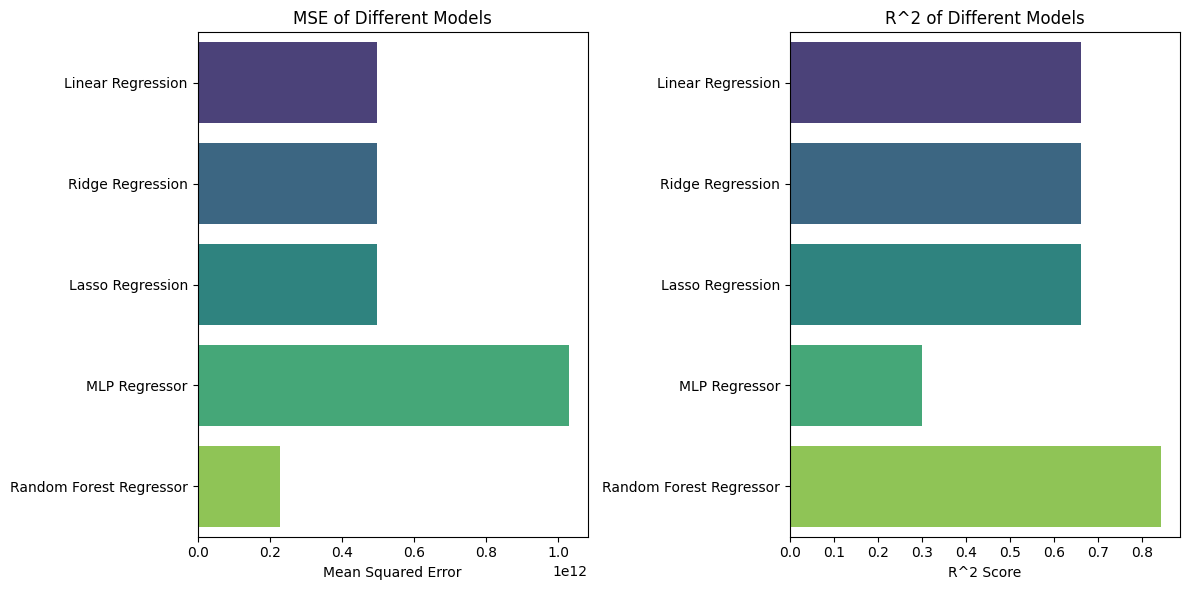

In [86]:
# Dictionary to hold the models
models = {
    'Linear Regression': model,
    'Ridge Regression': ridge_model,
    'Lasso Regression': Lasso_model,
    'MLP Regressor': mlp_model,
    'Random Forest Regressor': forest_model
}

# Lists to store evaluation results
model_names = []
mse_values = []
r2_values = []

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_names.append(name)
    mse_values.append(mse)
    r2_values.append(r2)

# Identify the best models based on MSE and R²
best_mse_model_index = np.argmin(mse_values)
best_r2_model_index = np.argmax(r2_values)

best_mse_model = model_names[best_mse_model_index]
best_r2_model = model_names[best_r2_model_index]

print(f"Model with lowest MSE: {best_mse_model} (MSE: {mse_values[best_mse_model_index]})")
print(f"Model with highest R²: {best_r2_model} (R²: {r2_values[best_r2_model_index]})")

# Plot MSE and R^2
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=mse_values, y=model_names, palette="viridis")
plt.xlabel('Mean Squared Error')
plt.title('MSE of Different Models')

plt.subplot(1, 2, 2)
sns.barplot(x=r2_values, y=model_names, palette="viridis")
plt.xlabel('R^2 Score')
plt.title('R^2 of Different Models')

plt.tight_layout()
plt.show()


In [87]:
# Make predictions on the test set using the trained Random Forest Regressor model
y_pred = forest_model.predict(X_test)
# Print the predicted values and the actual values for each sample in the test set
for i in range(len(y_pred)):
    print(y_pred[i],' ',y_test.iloc[i])

516020.0   445000.0
447410.0   335000.0
821500.0   825000.0
1605960.0   1925000.0
846680.0   1709000.0
619210.0   675000.0
560270.0   679000.0
568200.0   564000.0
586740.0   535000.0
257120.0   375000.0
597590.0   525000.0
249690.0   200000.0
689340.0   1025000.0
714220.0   1005000.0000000001
567780.0   585000.0
793365.0   1082000.0
1402120.0   1283000.0
807000.0   699000.0
960130.0   1113000.0
204800.0   239000.0
277550.0   280000.0
2714820.0   2700000.0
454100.0   580000.0
2823900.0   2675000.0
273030.0   310000.0
520250.0   595000.0
420610.0   280000.0
778540.0   585000.0
1178630.0   1234000.0
110630.0   90000.0
4341540.0   3894000.0
114700.0   120000.0
910460.0   825000.0
2489773.3333333335   2150000.0
794430.0   600000.0
564610.0   594000.0
2872090.0   4900000.0
339830.0   254999.99999999997
569640.0   635000.0
533070.0   565000.0
421250.0   450000.0
2711440.0   2678000.0
1322880.0   1300000.0
1738470.0   1550000.0
661930.0   739000.0
1018140.0   770000.0
90050.0   150000.0
567428

In [88]:
from joblib import dump, load
# Save the trained Random Forest Regressor model to a file
dump(forest_model, 'forest_model.joblib')

['forest_model.joblib']

In [89]:
# Create an empty DataFrame for storing car information
data_of_car = pd.DataFrame()
# Add a column 'Name' to the DataFrame with unique car names from the original data
data_of_car['Name'] = data['Name'].unique()
# Add a column 'Fuel_Type' to the DataFrame by applying a lambda function to get the fuel type for each car name
data_of_car['Fuel_Type'] = data_of_car['Name'].apply(lambda x: data[data['Name'] == x]['Fuel_Type'].iloc[0])

In [90]:
# Add a column 'Transmission' to the DataFrame by applying a lambda function to get the transmission type for each car name
data_of_car['Transmission'] = data_of_car['Name'].apply(lambda x: data[data['Name'] == x]['Transmission'].iloc[0])

In [91]:
# Add a column 'Engine' to the DataFrame by applying a lambda function to get the engine specification for each car name
data_of_car['Engine'] = data_of_car['Name'].apply(lambda x: data[data['Name'] == x]['Engine'].iloc[0])

In [92]:
# Add a column 'Seats' to the DataFrame by applying a lambda function to get the number of seats for each car name
data_of_car['Seats'] = data_of_car['Name'].apply(lambda x: data[data['Name'] == x]['Seats'].iloc[0])

In [93]:
# Add a column 'EngineCC' to the DataFrame by applying a lambda function to get the number of seats for each car name
data_of_car['EngineCC'] = data_of_car['Name'].apply(lambda x: data[data['Name'] == x]['EngineCC'].iloc[0])

In [94]:
# Add a column 'PowerPHP' to the DataFrame by applying a lambda function to get the number of seats for each car name
data_of_car['PowerPHP'] = data_of_car['Name'].apply(lambda x: data[data['Name'] == x]['PowerPHP'].iloc[0])

In [95]:
# Add a column 'price_per_km' to the DataFrame by applying a lambda function to get the number of seats for each car name
data_of_car['price_per_km'] = data_of_car['Name'].apply(lambda x: data[data['Name'] == x]['price_per_km'].min())

In [96]:
data_of_car

,Name,Fuel_Type,Transmission,Engine,Seats,EngineCC,PowerPHP,price_per_km
0,Maruti Wagon R LXI CNG,CNG,Manual,998 CC,5.0,998.0,58.16,0.062030
1,Hyundai Creta 1.6 CRDi SX Option,Diesel,Manual,1582 CC,5.0,1582.0,126.20,0.042768
2,Honda Jazz V,Petrol,Manual,1199 CC,5.0,1199.0,88.70,0.052381
3,Maruti Ertiga VDI,Diesel,Manual,1248 CC,7.0,1248.0,88.76,0.033029
4,Audi A4 New 2.0 TDI Multitronic,Diesel,Automatic,1968 CC,5.0,1968.0,140.80,0.055345
...,...,...,...,...,...,...,...,...
1869,Hyundai Elantra SX,Petrol,Manual,1797 CC,5.0,1797.0,147.50,0.058487
1870,Maruti Wagon R Duo Lxi,LPG,Manual,998 CC,5.0,998.0,58.20,0.023378
1871,Volkswagen Polo IPL II 1.2 Petrol Highline,Petrol,Manual,1198 CC,5.0,1198.0,73.90,0.055298
1872,Tata Bolt Revotron XT,Petrol,Manual,1193 CC,5.0,1193.0,88.70,0.054259


In [97]:
# Drop specified columns from the DataFrame
data = data.drop(columns=['Fuel_Type', 'Transmission', 'Engine', 'Seats', 'price_per_km','Mileage_gt','Mileage_dv','PowerPHP','Mileage','EngineCC'])

In [98]:
import  sqlite3
# Connect to the SQLite database (or create it if it does not exist)
con = sqlite3.connect("car.db")
# Create a cursor object using the connection
cur = con.cursor()

In [99]:
data.to_sql('data', con, index=False, if_exists='replace')

6017

In [100]:
data_of_car.to_sql('data_of_car', con, index=False, if_exists='replace')

1874